In [99]:
def crank_nicolson(Δx, Δt, mass, vt1, vt2=None):
    """Generate the Crank-Nicolson matrix that will do our evolution
    vt2 allows us to set a different potential at the next timestep.
    """
    if vt2 is None: vt2 = vt1
    ħ = 1.0545718e-34 # kgm^2/s
    α = ħ*Δt/(2*mass*Δx**2)
    Mt = np.zeros((len(vt1), len(vt1)), dtype=np.complex128)
    off_diag = np.full(len(vt1) - 1, 1j*α, dtype=np.complex128)
    Mt += np.diag(off_diag, 1)
    Mt += np.diag(off_diag, -1)
    Mtdt = np.copy(Mt)
    Mt += np.diag(1 + 2*1j*α - 1j*Δt/ħ*vt1)
    Mtdt += np.diag(1 + 2*1j*α - 1j*Δt/ħ*vt2)
    return 0.5 * np.linalg.inv(np.eye(len(vt1), dtype=np.complex128) - 0.5 * Mtdt) @ Mt

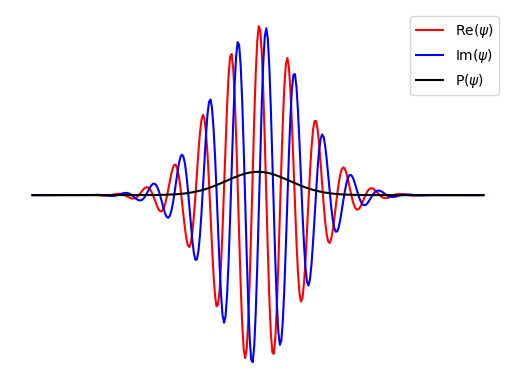

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def probability(state):
    prob = np.abs(state)**2
    return prob / prob.sum()
def gaussian(k, σ, x, xs):
    state = np.exp(-(xs-x)**2/(2*σ**2)) * np.exp(1j * k * xs)
    state = state / np.sqrt((np.abs(state)**2).sum())
    return state
def plot_state(xs, state, axis):
    axis.plot(xs, state.real, color="red", label=r"$\mathrm{Re}(\psi)$")
    axis.plot(xs, state.imag, color="blue", label=r"$\mathrm{Im}(\psi)$")
    axis.plot(xs, probability(state), color="black", label=r"$\mathrm{P}(\psi)$")
xs = np.linspace(0, 1, 300)
state = gaussian(100, 0.1, 0.5, xs)
fig, axis = plt.subplots()
axis.axis('off')
plot_state(xs, state, axis)
axis.legend()


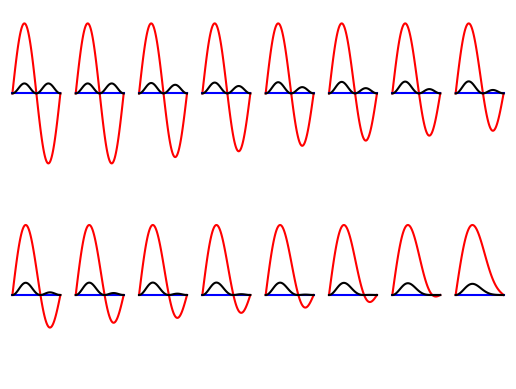

In [104]:
xs = np.linspace(0, 1e-32, 100)
state = 1*np.sin(2*xs*np.pi/(1e-32))+0*np.sin(1*xs*np.pi/(1e-32))
state = state / np.sqrt((np.abs(state)**2).sum())
fig, axs = plt.subplots(2, 8)
C = crank_nicolson(np.abs(xs[1]-xs[0]), 1e-37, 1, np.zeros_like(xs))
C = np.linalg.matrix_power(C, steps)
for i, ax in enumerate(axs.flatten()):
    r=i/15
    max_val = np.abs(np.max(state)) * 1.2
    steps = 31
    ax.set_ylim(-max_val, max_val)
    ax.axis('off')
    plot_state(xs, state, ax)
    state=r*np.sin(1*xs*np.pi/(1e-32))+np.sqrt(1-r**2)*np.sin(2*xs*np.pi/(1e-32))
    state = state / np.sqrt((np.abs(state)**2).sum())
    #state = C@state


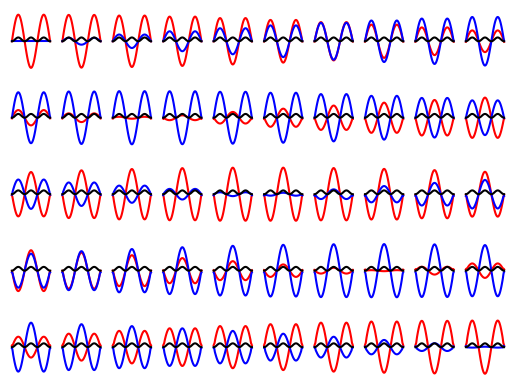

In [102]:
xs = np.linspace(0, 1e-32, 100)
state = np.sin(3*xs*np.pi/(1e-32))
state = state / np.sqrt((np.abs(state)**2).sum())
max_val = np.abs(np.max(state)) * 1.2
steps = 31
fig, axs = plt.subplots(5, 10)
C = crank_nicolson(np.abs(xs[1]-xs[0]), 1e-37, 1, np.zeros_like(xs))
C = np.linalg.matrix_power(C, steps)
for i, ax in enumerate(axs.flatten()):
    ax.set_ylim(-max_val, max_val)
    ax.axis('off')
    plot_state(xs, state, ax)
    state = C@state

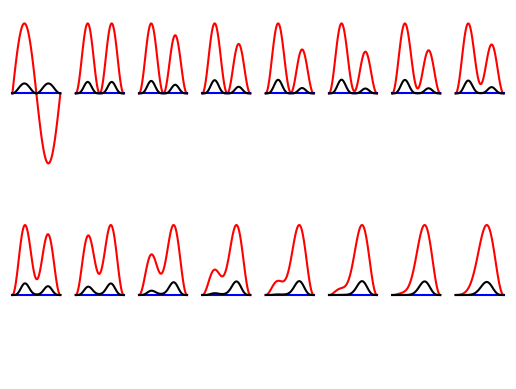

In [105]:
xs = np.linspace(0, 1e-32, 100)
state = 1*np.sin(2*xs*np.pi/(1e-32))+0*np.sin(1*xs*np.pi/(1e-32))
state = state / np.sqrt((np.abs(state)**2).sum())
fig, axs = plt.subplots(2, 8)
C = crank_nicolson(np.abs(xs[1]-xs[0]), 1e-37, 1, np.zeros_like(xs))
C = np.linalg.matrix_power(C, steps)
for i, ax in enumerate(axs.flatten()):
    r=i/15
    max_val = np.abs(np.max(state)) * 1.2
    steps = 31
    ax.set_ylim(-max_val, max_val)
    ax.axis('off')
    plot_state(xs, state, ax)
    state=(r*np.sin(1*xs*np.pi/(1e-32))*np.exp(-1j*1/2*np.pi*r)+np.sqrt(1-r**2)*np.sin(2*xs*np.pi/(1e-32))*np.exp(-1j*3/2*np.pi*r))*(r*np.sin(1*xs*np.pi/(1e-32))*np.exp(1j*1/2*np.pi*r)+np.sqrt(1-r**2)*np.sin(2*xs*np.pi/(1e-32))*np.exp(1j*3/2*np.pi*r))
    state = state / np.sqrt((np.abs(state)**2).sum())
    #state = C@state


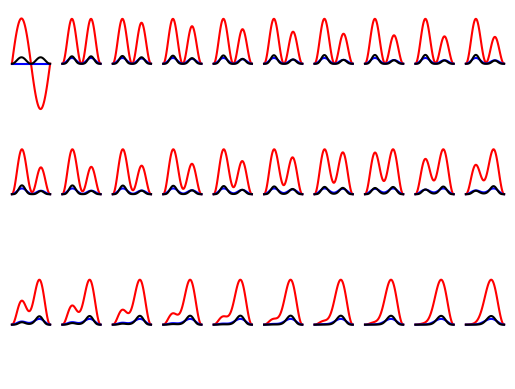

In [108]:
xs = np.linspace(0, 1e-32, 100)
state = 1*np.sin(2*xs*np.pi/(1e-32))+0*np.sin(1*xs*np.pi/(1e-32))
state = state / np.sqrt((np.abs(state)**2).sum())
fig, axs = plt.subplots(3, 10)
C = crank_nicolson(np.abs(xs[1]-xs[0]), 1e-37, 1, np.zeros_like(xs))
C = np.linalg.matrix_power(C, steps)
for i, ax in enumerate(axs.flatten()):
    r=i/31
    max_val = np.abs(np.max(state)) * 1.2
    steps = 31
    ax.set_ylim(-max_val, max_val)
    ax.axis('off')
    plot_state(xs, state, ax)
    state=(r*np.sin(1*xs*np.pi/(1e-32))*np.exp(-1j*1/2*np.pi*r)+np.sqrt(1-r**2)*np.sin(2*xs*np.pi/(1e-32))*np.exp(-1j*3/2*np.pi*r))*(r*np.sin(1*xs*np.pi/(1e-32))*np.exp(1j*1/2*np.pi*r)+np.sqrt(1-r**2)*np.sin(2*xs*np.pi/(1e-32))*np.exp(1j*3/2*np.pi*r))
    state = state / np.sqrt((np.abs(state)**2).sum())
    state = C@state
